In [5]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_path = 'D:/PetImages'

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')

# Загрузка данных
train_dataset = image_dataset_from_directory(
    train_dir,  # Путь к папке с изображениями для тренировки
    image_size=(150, 150),  # Размер изображений
    batch_size=32,  # Размер батча
    label_mode='binary',  # Бинарные метки для классификации (кошки или собаки)
    validation_split=0.2,  # Разделение на тренировочную и валидационную выборки
    subset='training',  # Для тренировочной выборки
    seed=123  # Для воспроизводимости
)

val_dataset = image_dataset_from_directory(
    val_dir,  # Путь к папке с изображениями для тренировки
    image_size=(150, 150),  # Размер изображений
    batch_size=32,  # Размер батча
    label_mode='binary',  # Бинарные метки для классификации (кошки или собаки)
    validation_split=0.2,  # Разделение на тренировочную и валидационную выборки
    subset='validation',  # Для валидационной выборки
    seed=123  # Для воспроизводимости
)

# Предобработка данных (например, нормализация пикселей)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Настройка предсказаний
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [16]:
from tensorflow.keras import layers, models

# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),  # Масштабирование пикселей
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(1)  # Выходной слой для бинарной классификации
# ])

# # Компиляция модели
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Обучение модели
# history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Создание модели
model = models.Sequential()

# Сверточные слои
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Полносвязные слои для классификации
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

# Выходной слой
model.add(layers.Dense(1, activation='sigmoid'))  # Для бинарной классификации (кошки/собаки)

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 64)      

In [17]:
history = model.fit(
    train_dataset,
    epochs=50,  # Количество эпох
    validation_data=val_dataset
)


Epoch 1/50
50/50 [==============================] - 1s 14ms/step - loss: 0.6965 - accuracy: 0.4812 - val_loss: 0.6919 - val_accuracy: 0.5650
Epoch 2/50
50/50 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.5106 - val_loss: 0.6892 - val_accuracy: 0.6250
Epoch 3/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.5119 - val_loss: 0.6871 - val_accuracy: 0.5650
Epoch 4/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6749 - accuracy: 0.5869 - val_loss: 0.6712 - val_accuracy: 0.5900
Epoch 5/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6411 - accuracy: 0.6363 - val_loss: 0.6455 - val_accuracy: 0.6450
Epoch 6/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6157 - accuracy: 0.6575 - val_loss: 0.6971 - val_accuracy: 0.6250
Epoch 7/50
50/50 [==============================] - 1s 10ms/step - loss: 0.5584 - accuracy: 0.7163 - val_loss: 0.7320 - val_accuracy: 0.6350
Epoch 8/50
50

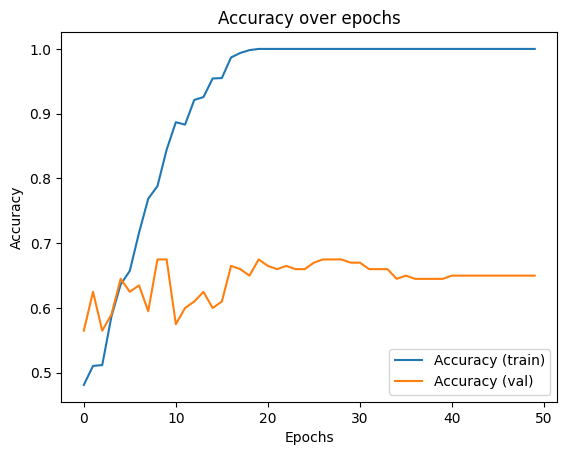

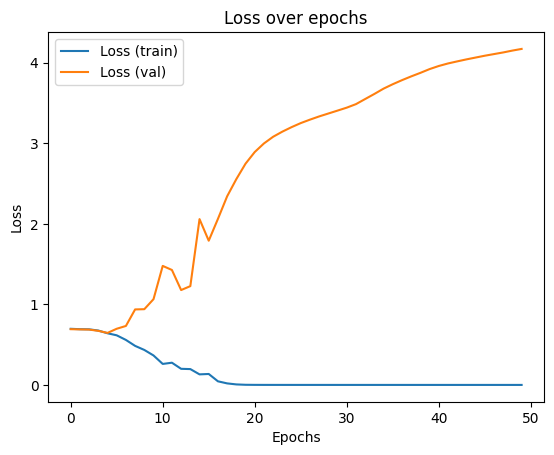

KeyError: 'mse'

In [22]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# График функции потерь
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


In [26]:
# Загрузка нового изображения
from tensorflow.keras.preprocessing import image

img_path = 'main.jpg'  # Путь к новому изображению
img = image.load_img(img_path, target_size=(150, 150))  # Преобразование изображения
img_array = image.img_to_array(img)  # Преобразование в массив
img_array = tf.expand_dims(img_array, 0)  # Добавление батча

# Предсказание
predictions = model.predict(img_array)

# Вывод результата
if predictions[0] > 0.5:
    print("Это собака!")
else:
    print("Это кошка!")


Это собака!
